In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from fastf1 import plotting

In [2]:
#2023 Event Schedule
schedule = ff1.get_event_schedule(2023)
schedule.iloc[:,:5]

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/kanimozhivelusamy/Library/Caches/fastf1.
	Size: 2.86 GB


,RoundNumber,Country,Location,OfficialEventName,EventDate
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02


In [3]:
# Function to retrieve team pace data for a given round
def get_team_pace_data(year, round_number):
    # Get qualifying session data for the specified year and round
    qualifying_session = ff1.get_session(year, round_number, 'Q')
    qualifying_session.load()
    
    # Extract results from the qualifying session
    results = qualifying_session.results
    
    # Identify the fastest driver from each team
    fastest_drivers_idx = results.groupby('TeamName')['Position'].idxmin()
    fastest_drivers = results.loc[fastest_drivers_idx]

    # Create a DataFrame to store team pace information
    team_pace = pd.DataFrame()
    
    # Extract team names
    team_pace['Team Name'] = fastest_drivers['TeamName']
    
    # Find the fastest time from Q1, Q2, and Q3 for each team
    team_pace['FastestTime'] = fastest_drivers[['Q1', 'Q2', 'Q3']].min(axis=1)
    
    # Sort the DataFrame based on the fastest time
    team_pace = team_pace.sort_values(by='FastestTime')
    
    # Calculate relative pace compared to the fastest team
    team_pace['Relative Pace'] = team_pace['FastestTime'].map(lambda time: round(time / team_pace.iloc[0]['FastestTime'] * 100 - 99, 2))

    return team_pace,fastest_drivers

# Get team pace data for 10 rounds
all_team_pace_data = []

for round_number in range(1, 11):
    # Retrieve team pace data for the current round
    team_pace_data, fastest_drivers = get_team_pace_data(2023, round_number)
    
    # Append the data to the list for all rounds
    all_team_pace_data.append(team_pace_data)


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Us

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [4]:
fastest_drivers

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,,15.0,,NaN,0 days 00:01:29.798000,NaT,NaT,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,,17.0,,NaN,0 days 00:01:30.025000,NaT,NaT,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,,10.0,,NaN,0 days 00:01:29.533000,0 days 00:01:28.751000,0 days 00:01:27.689000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,,9.0,,NaN,0 days 00:01:29.949000,0 days 00:01:28.368000,0 days 00:01:27.659000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,,4.0,,NaN,0 days 00:01:29.143000,0 days 00:01:28.361000,0 days 00:01:27.136000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,,11.0,,NaN,0 days 00:01:29.603000,0 days 00:01:28.896000,NaT,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,,2.0,,NaN,0 days 00:01:28.917000,0 days 00:01:28.042000,0 days 00:01:26.961000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,,6.0,,NaN,0 days 00:01:29.412000,0 days 00:01:28.782000,0 days 00:01:27.155000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,,NaN,0 days 00:01:29.428000,0 days 00:01:27.702000,0 days 00:01:26.720000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,,8.0,,NaN,0 days 00:01:29.466000,0 days 00:01:28.067000,0 days 00:01:27.530000,NaT,,NaN


In [5]:
# Iterate through all_team_pace_data to display fastest drivers for each round
for round_number, team_pace_data in enumerate(all_team_pace_data, start=1):
    # Display information about the fastest drivers for each team
    for index, row in team_pace_data.iterrows():
        print(fastest_drivers)
    


   DriverNumber BroadcastName Abbreviation        DriverId         TeamName  \
77           77      V BOTTAS          BOT          bottas       Alfa Romeo   
22           22     Y TSUNODA          TSU         tsunoda       AlphaTauri   
10           10       P GASLY          GAS           gasly           Alpine   
14           14      F ALONSO          ALO          alonso     Aston Martin   
16           16     C LECLERC          LEC         leclerc          Ferrari   
27           27  N HULKENBERG          HUL      hulkenberg     Haas F1 Team   
4             4      L NORRIS          NOR          norris          McLaren   
63           63     G RUSSELL          RUS         russell         Mercedes   
1             1  M VERSTAPPEN          VER  max_verstappen  Red Bull Racing   
23           23       A ALBON          ALB           albon         Williams   

   TeamColor        TeamId  FirstName    LastName         FullName  ...  \
77    C92D4B          alfa   Valtteri      Bottas  Valt

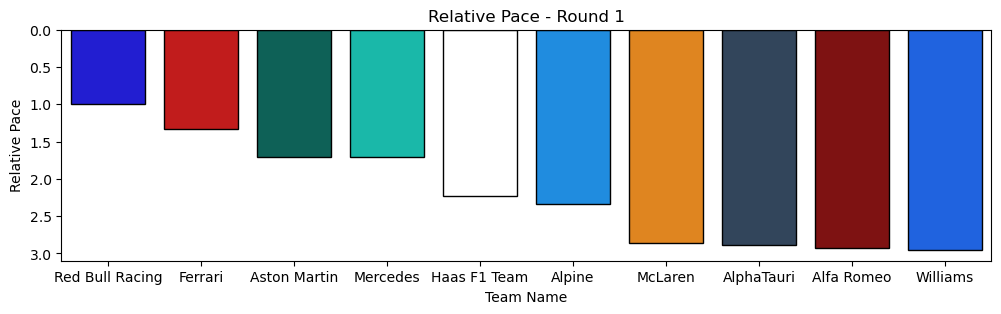

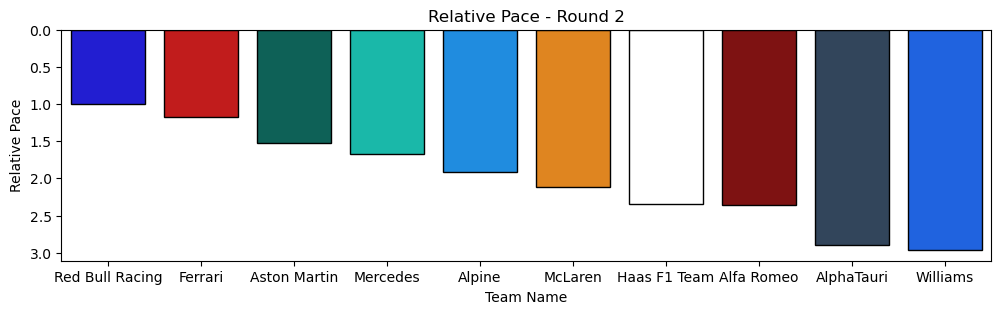

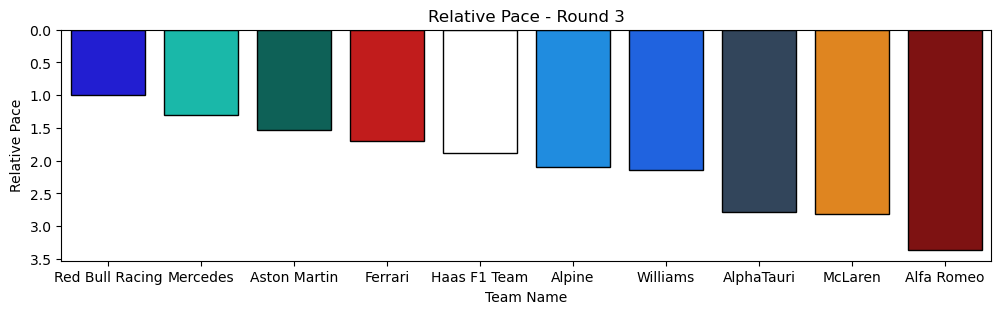

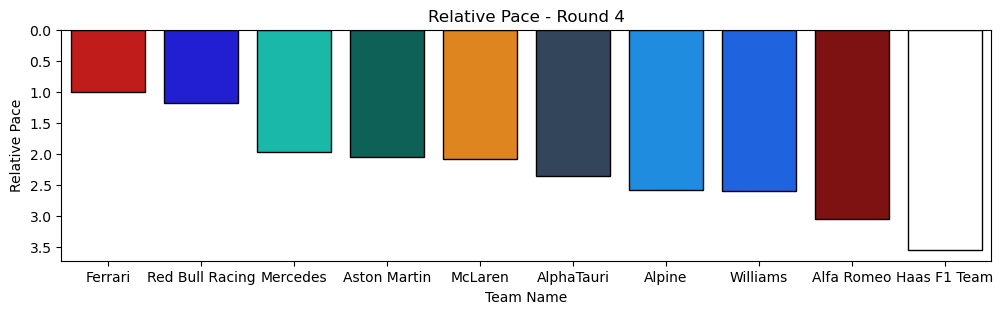

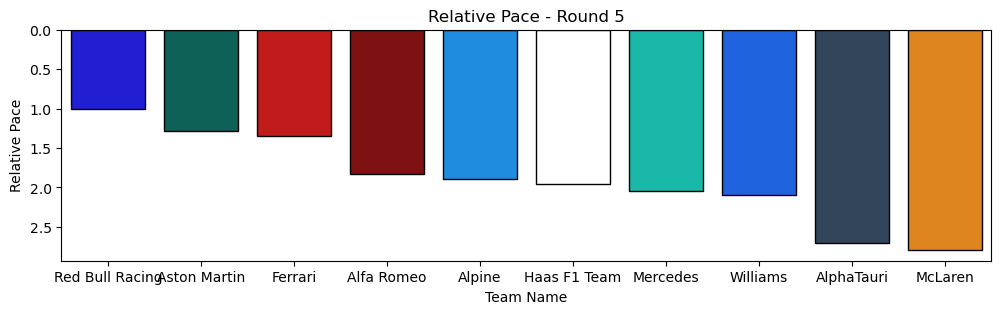

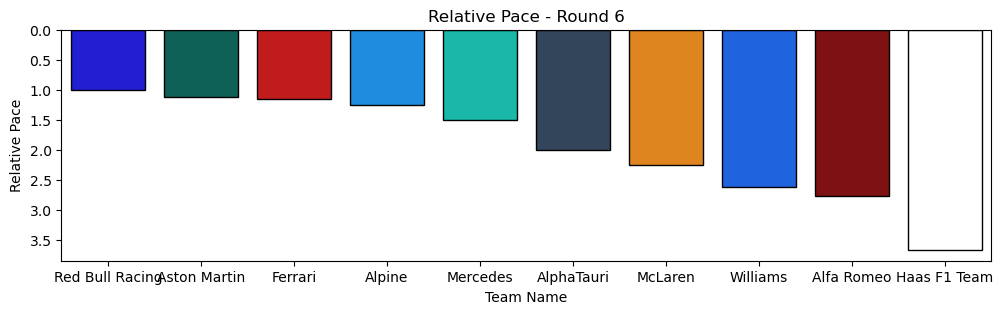

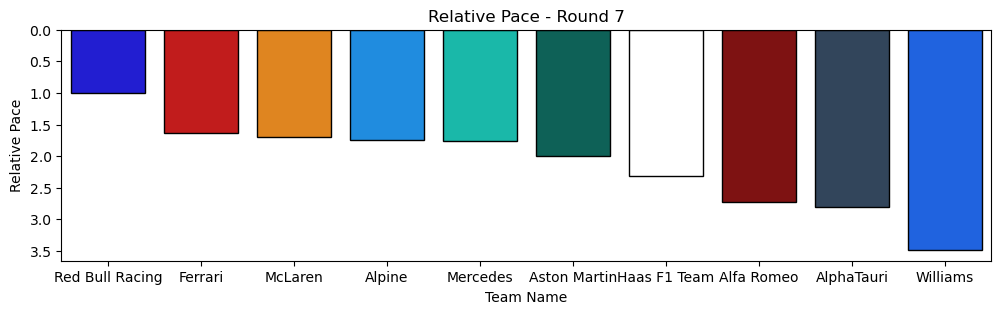

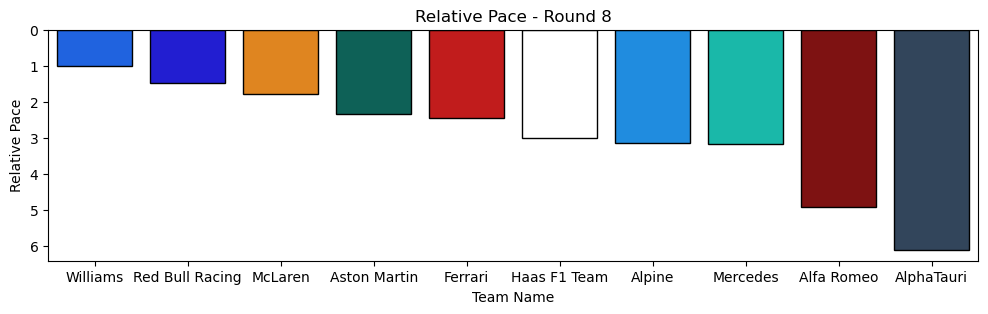

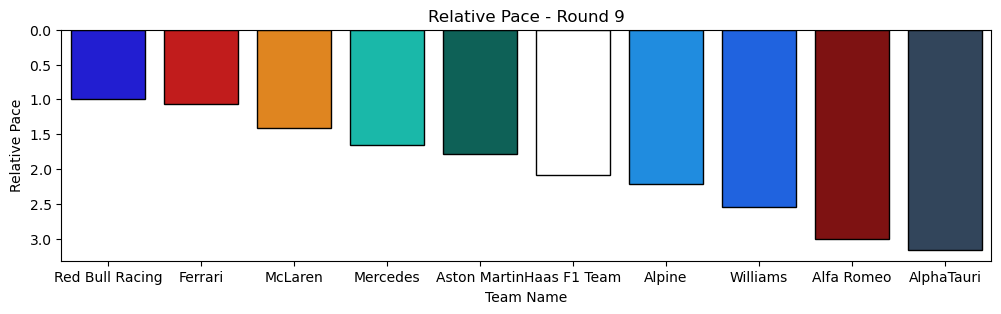

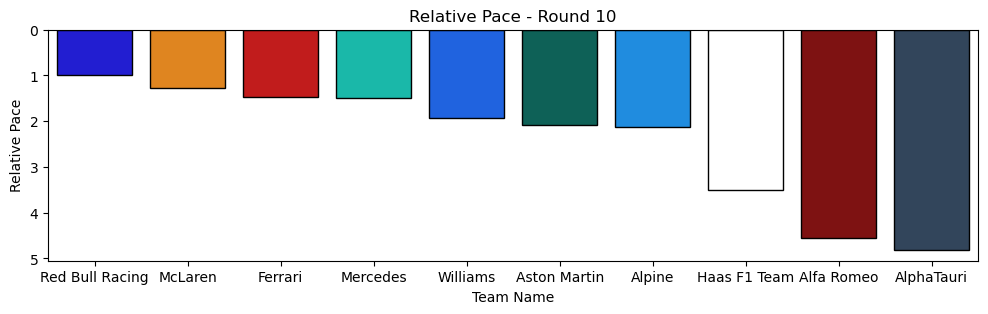

In [6]:
# Plotting for each round
for round_number, team_pace_data in enumerate(all_team_pace_data, start=1):
    # Create a figure for the current round
    plt.figure(figsize=(12, 3))
    
    # Plotting a bar chart
    sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=team_pace_data, 
        color='white', 
        edgecolor='black', 
        palette=team_pace_data['Team Name'].map(plotting.team_color).to_list()
    )
    
    
    
    # Set plot title
    plt.title(f'Relative Pace - Round {round_number}')
    plt.gca().invert_yaxis()
    plt.show()

In [7]:
# Calculate average relative pace across all rounds
average_team_pace = pd.concat(all_team_pace_data).groupby('Team Name')['Relative Pace'].mean().reset_index()
average_team_pace = average_team_pace.sort_values(by='Relative Pace')
# Display the average relative pace
print("Average Relative Pace Across All Rounds:")
print(average_team_pace)
print("\n")


Average Relative Pace Across All Rounds:
         Team Name  Relative Pace
8  Red Bull Racing          1.066
4          Ferrari          1.434
3     Aston Martin          1.742
7         Mercedes          1.827
6          McLaren          2.108
2           Alpine          2.132
9         Williams          2.435
5     Haas F1 Team          2.657
0       Alfa Romeo          3.151
1       AlphaTauri          3.253




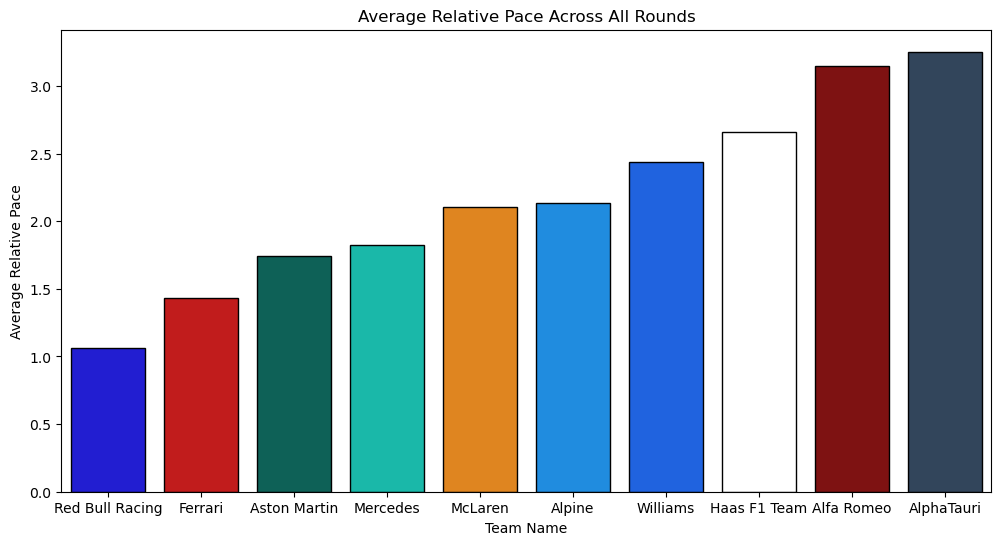

In [8]:
# Plot the average relative pace
plt.figure(figsize=(12, 6))
sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=average_team_pace, 
        color='white', 
        edgecolor='black', 
        palette=average_team_pace['Team Name'].map(plotting.team_color).to_list()
    )
#sns.barplot(x='Team Name', y='Relative Pace', data=average_team_pace, color='pink')
plt.title('Average Relative Pace Across All Rounds')
plt.ylabel('Average Relative Pace')
plt.show()

In [9]:
# Function to retrieve team pace data for a given round
def get_team_pace_data2(year, round_number):
    # Get qualifying session data for the specified year and round
    qualifying_session = ff1.get_session(year, round_number, 'Q')
    qualifying_session.load()
    
    # Extract results from the qualifying session
    results = qualifying_session.results
    
    # Identify the fastest driver from each team
    fastest_drivers_idx = results.groupby('TeamName')['Position'].idxmin()
    fastest_drivers2 = results.loc[fastest_drivers_idx]

    # Create a DataFrame to store team pace information
    team_pace = pd.DataFrame()
    
    # Extract team names
    team_pace['Team Name'] = fastest_drivers2['TeamName']
    
    # Find the fastest time from Q1, Q2, and Q3 for each team
    team_pace['FastestTime'] = fastest_drivers2[['Q1', 'Q2', 'Q3']].min(axis=1)
    
    # Sort the DataFrame based on the fastest time
    team_pace = team_pace.sort_values(by='FastestTime')
    
    # Calculate relative pace compared to the fastest team
    team_pace['Relative Pace'] = team_pace['FastestTime'].map(lambda time: round(time / team_pace.iloc[0]['FastestTime'] * 100 - 99, 2))

    return team_pace,fastest_drivers2

# Get team pace data for 10 rounds
all_team_pace_data2 = []

for round_number in range(11, 23):
    # Retrieve team pace data for the current round
    team_pace_data2, fastest_drivers2 = get_team_pace_data(2023, round_number)
    
    # Append the data to the list for all rounds
    all_team_pace_data2.append(team_pace_data2)


core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '24', '16', '77', '14', '11', '27', '55', '31', '3', '18', '10', '23', '22', '63', '20', '2']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using c

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for t

In [10]:
fastest_drivers2

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,,18.0,,NaN,0 days 00:01:24.788000,NaT,NaT,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,,6.0,,NaN,0 days 00:01:24.286000,0 days 00:01:24.207000,0 days 00:01:23.968000,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,,10.0,,NaN,0 days 00:01:24.600000,0 days 00:01:24.078000,0 days 00:01:24.548000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,,7.0,,NaN,0 days 00:01:24.501000,0 days 00:01:24.131000,0 days 00:01:24.084000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,,2.0,,NaN,0 days 00:01:24.459000,0 days 00:01:23.969000,0 days 00:01:23.584000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,,8.0,,NaN,0 days 00:01:24.425000,0 days 00:01:24.213000,0 days 00:01:24.108000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,,3.0,,NaN,0 days 00:01:24.487000,0 days 00:01:24.278000,0 days 00:01:23.782000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,,4.0,,NaN,0 days 00:01:24.337000,0 days 00:01:24.013000,0 days 00:01:23.788000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,,NaN,0 days 00:01:24.160000,0 days 00:01:23.740000,0 days 00:01:23.445000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,,14.0,,NaN,0 days 00:01:24.298000,0 days 00:01:24.439000,NaT,NaT,,NaN


In [11]:
# Iterate through all_team_pace_data to display fastest drivers for each round
for round_number, team_pace_data2 in enumerate(all_team_pace_data2, start=1):
    # Display information about the fastest drivers for each team
    for index, row in team_pace_data.iterrows():
        print(fastest_drivers2)
    

   DriverNumber BroadcastName Abbreviation        DriverId         TeamName  \
77           77      V BOTTAS          BOT          bottas       Alfa Romeo   
22           22     Y TSUNODA          TSU         tsunoda       AlphaTauri   
10           10       P GASLY          GAS           gasly           Alpine   
14           14      F ALONSO          ALO          alonso     Aston Martin   
16           16     C LECLERC          LEC         leclerc          Ferrari   
27           27  N HULKENBERG          HUL      hulkenberg     Haas F1 Team   
81           81     O PIASTRI          PIA         piastri          McLaren   
63           63     G RUSSELL          RUS         russell         Mercedes   
1             1  M VERSTAPPEN          VER  max_verstappen  Red Bull Racing   
23           23       A ALBON          ALB           albon         Williams   

   TeamColor        TeamId  FirstName    LastName         FullName  ...  \
77    C92D4B          alfa   Valtteri      Bottas  Valt

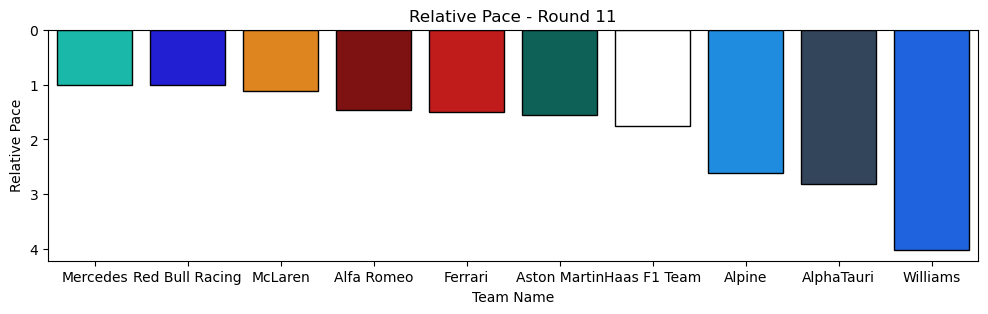

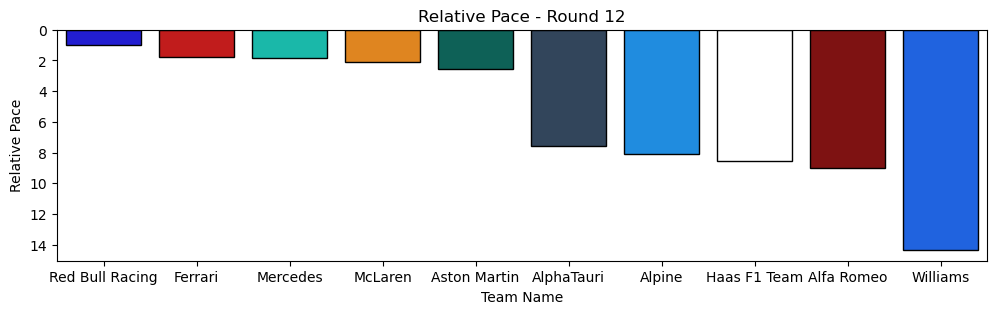

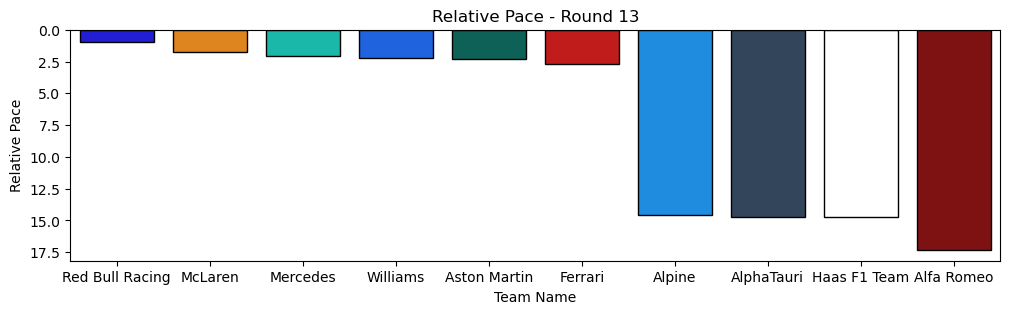

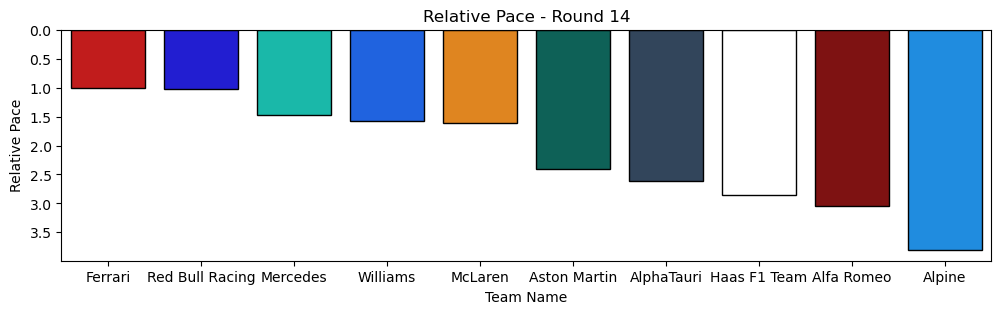

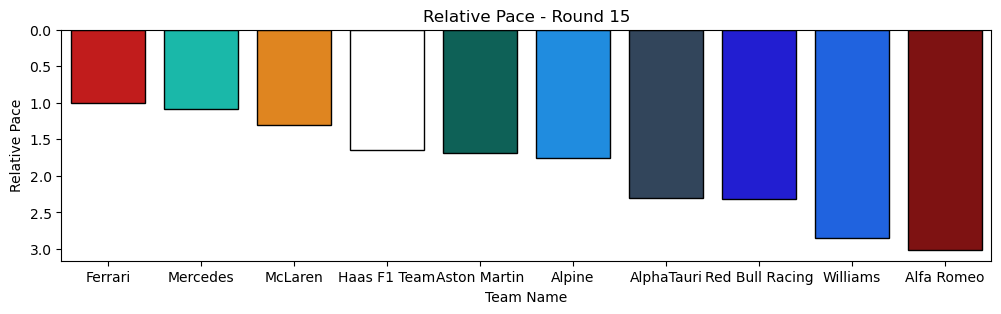

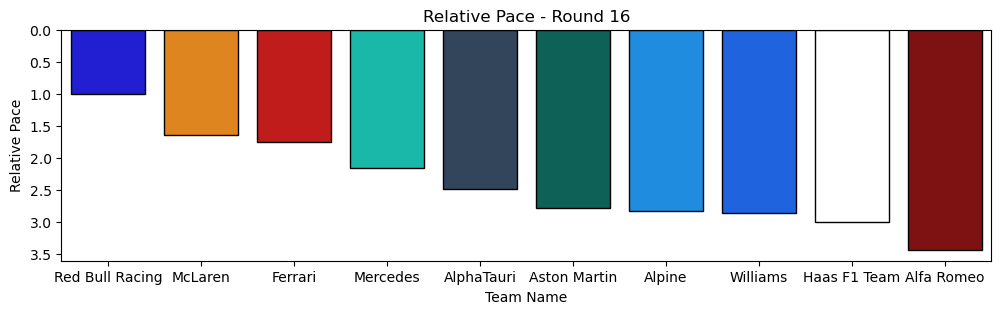

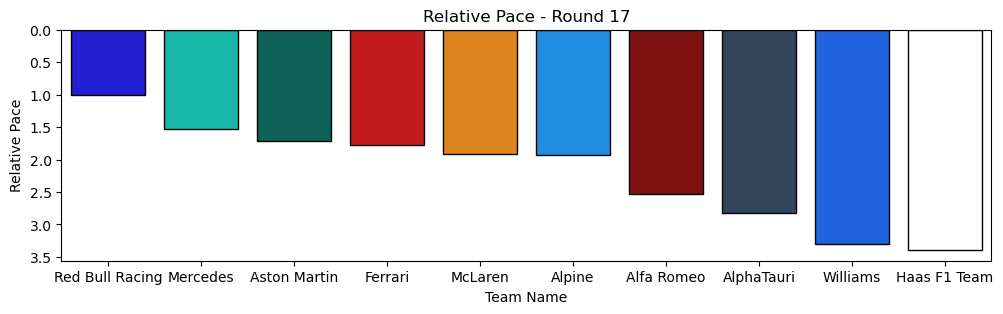

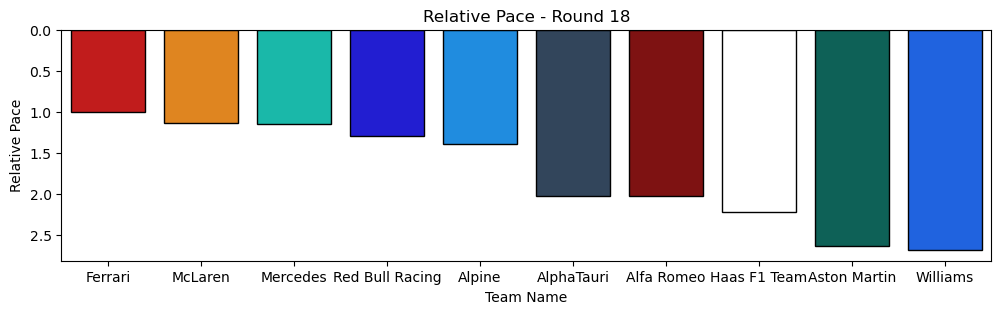

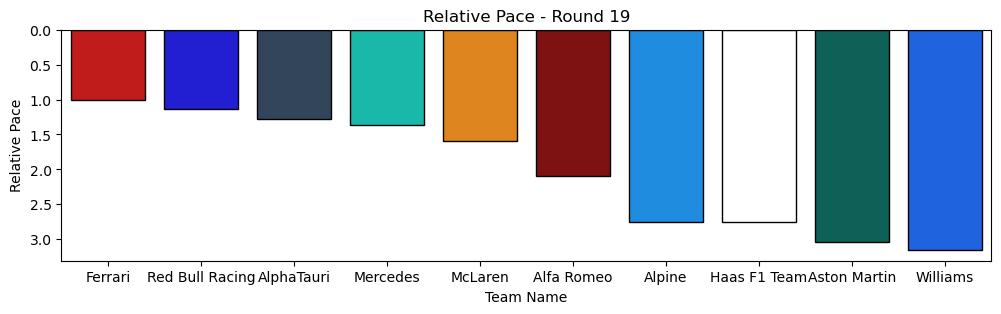

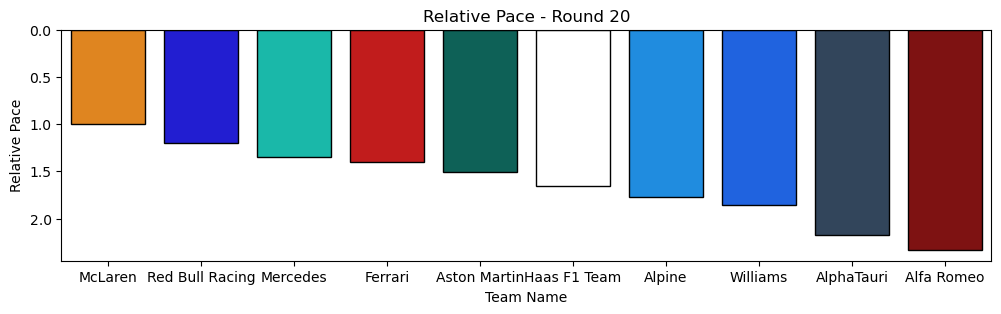

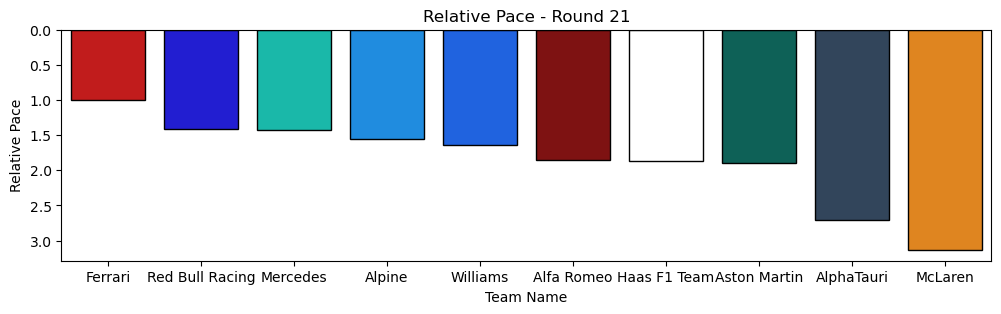

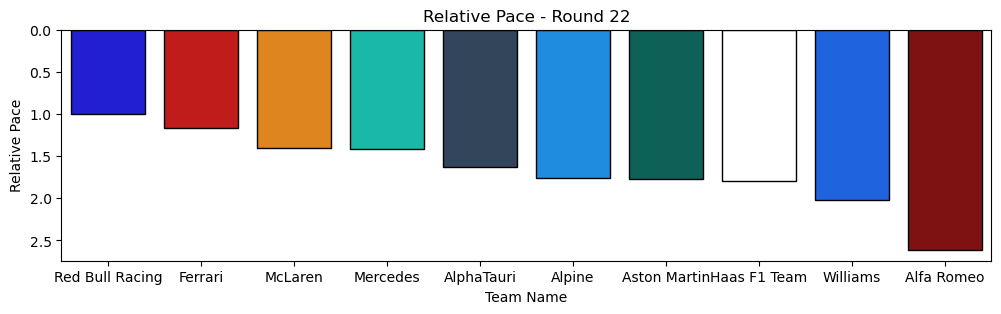

In [12]:
# Plotting for each round
for round_number, team_pace_data2 in enumerate(all_team_pace_data2, start=11):
    # Create a figure for the current round
    plt.figure(figsize=(12, 3))
    
    # Plotting a bar chart
    sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=team_pace_data2, 
        color='white', 
        edgecolor='black', 
        palette=team_pace_data2['Team Name'].map(plotting.team_color).to_list()
    )
    
    # Set plot title
    plt.title(f'Relative Pace - Round {round_number}')
    
    # Invert y-axis for better readability
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

In [13]:
# Calculate average relative pace across all rounds
average_team_pace2 = pd.concat(all_team_pace_data2).groupby('Team Name')['Relative Pace'].mean().reset_index()
average_team_pace2 = average_team_pace2.sort_values(by='Relative Pace')
# Display the average relative pace
print("Average Relative Pace Across All Rounds:")
print(average_team_pace2)
print("\n")

Average Relative Pace Across All Rounds:
         Team Name  Relative Pace
8  Red Bull Racing       1.197500
4          Ferrari       1.420000
7         Mercedes       1.486667
6          McLaren       1.645000
3     Aston Martin       2.158333
9         Williams       3.540833
2           Alpine       3.732500
1       AlphaTauri       3.760833
5     Haas F1 Team       3.849167
0       Alfa Romeo       4.230000




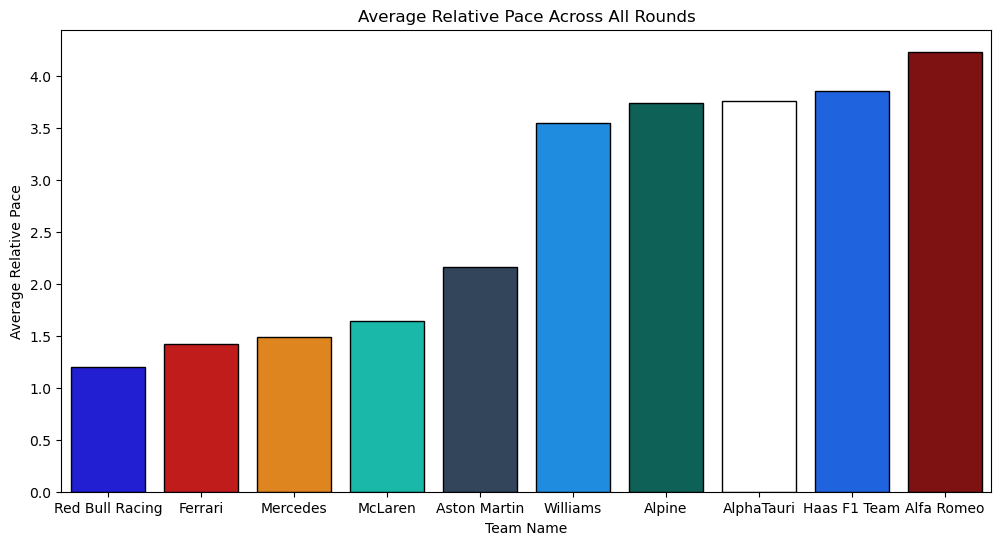

In [14]:
# Plot the average relative pace
plt.figure(figsize=(12, 6))
sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=average_team_pace2, 
        color='white', 
        edgecolor='black', 
        palette=team_pace_data2['Team Name'].map(plotting.team_color).to_list()
    )
#sns.barplot(x='Team Name', y='Relative Pace', data=average_team_pace, color='pink')
plt.title('Average Relative Pace Across All Rounds')
plt.ylabel('Average Relative Pace')
plt.show()

In [15]:
# Function to retrieve team pace data for a given round
def get_team_pace_data_new(year, round_number):
    # Get qualifying session data for the specified year and round
    qualifying_session_new = ff1.get_session(year, round_number, 'Q')
    qualifying_session_new.load()
    
    # Extract results from the qualifying session
    results_new = qualifying_session_new.results
    
    # Identify the fastest driver from each team
    fastest_drivers_new_idx = results_new.groupby('TeamName')['Position'].idxmin()
    fastest_drivers_new = results_new.loc[fastest_drivers_new_idx]

    # Create a DataFrame to store team pace information
    team_pace_new = pd.DataFrame()
    
    # Extract team names
    team_pace_new['Team Name'] = fastest_drivers_new['TeamName']
    
    # Find the fastest time from Q1, Q2, and Q3 for each team
    team_pace_new['FastestTime'] = fastest_drivers_new[['Q1', 'Q2', 'Q3']].min(axis=1)
    
    # Sort the DataFrame based on the fastest time
    team_pace_new = team_pace_new.sort_values(by='FastestTime')
    
    # Calculate relative pace compared to the fastest team
    team_pace_new['Relative Pace'] = team_pace_new['FastestTime'].map(lambda time: round(time / team_pace_new.iloc[0]['FastestTime'] * 100 - 99, 2))

    return team_pace_new,fastest_drivers_new

# Get team pace data for 10 rounds
all_team_pace_data_new = []

for round_number in range(11, 23):
    # Retrieve team pace data for the current round
    team_pace_data_new, fastest_drivers_new = get_team_pace_data_new(2023, round_number)
    
    # Append the data to the list for all rounds
    all_team_pace_data_new.append(team_pace_data_new)


core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '24', '16', '77', '14', '11', '27', '55', '31', '3', '18', '10', '23', '22', '63', '20', '2']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using c

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for t

In [16]:
fastest_drivers_new

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,,18.0,,NaN,0 days 00:01:24.788000,NaT,NaT,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,,6.0,,NaN,0 days 00:01:24.286000,0 days 00:01:24.207000,0 days 00:01:23.968000,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,,10.0,,NaN,0 days 00:01:24.600000,0 days 00:01:24.078000,0 days 00:01:24.548000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,,7.0,,NaN,0 days 00:01:24.501000,0 days 00:01:24.131000,0 days 00:01:24.084000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,,2.0,,NaN,0 days 00:01:24.459000,0 days 00:01:23.969000,0 days 00:01:23.584000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,,8.0,,NaN,0 days 00:01:24.425000,0 days 00:01:24.213000,0 days 00:01:24.108000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,,3.0,,NaN,0 days 00:01:24.487000,0 days 00:01:24.278000,0 days 00:01:23.782000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,,4.0,,NaN,0 days 00:01:24.337000,0 days 00:01:24.013000,0 days 00:01:23.788000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,,NaN,0 days 00:01:24.160000,0 days 00:01:23.740000,0 days 00:01:23.445000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,,14.0,,NaN,0 days 00:01:24.298000,0 days 00:01:24.439000,NaT,NaT,,NaN


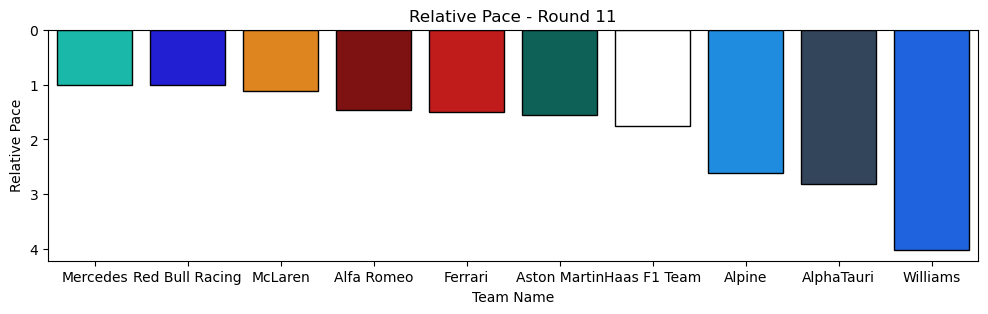

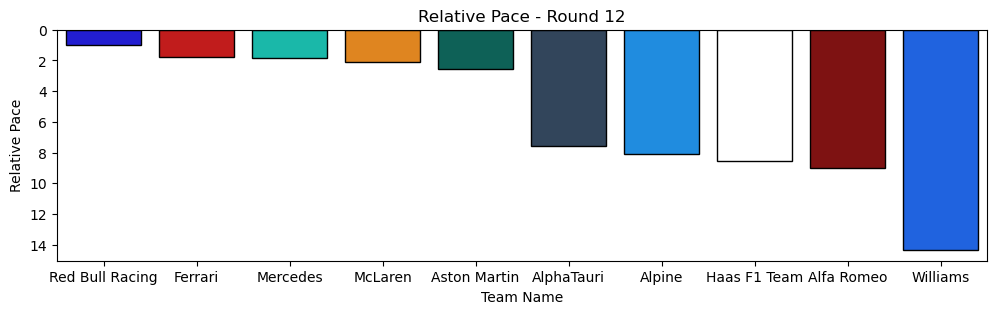

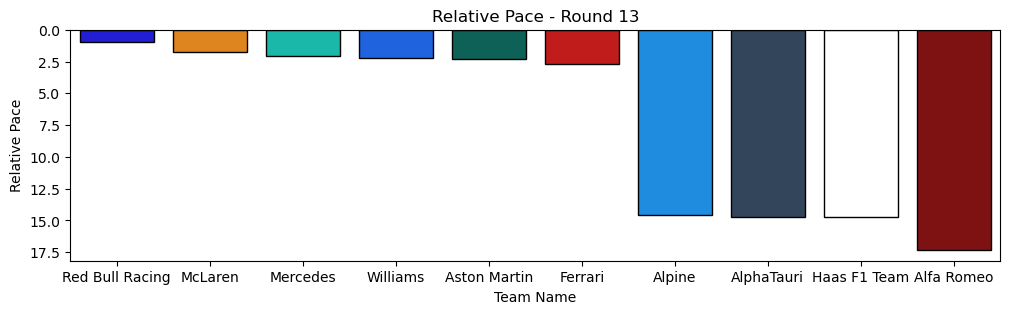

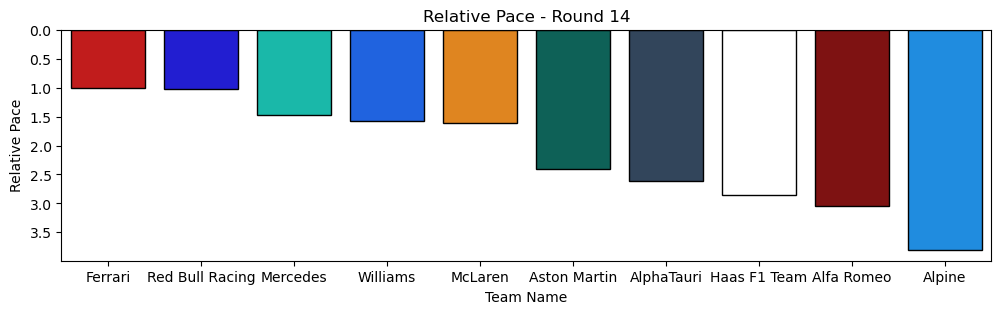

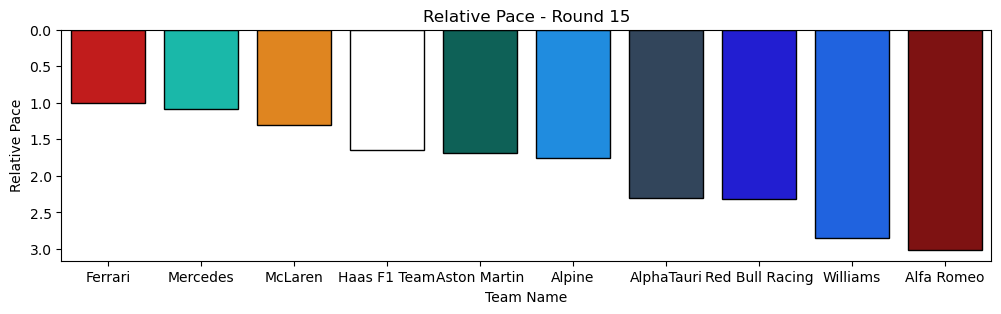

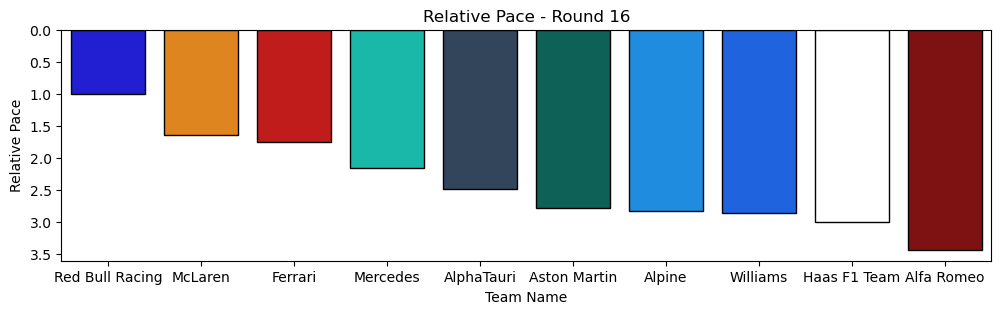

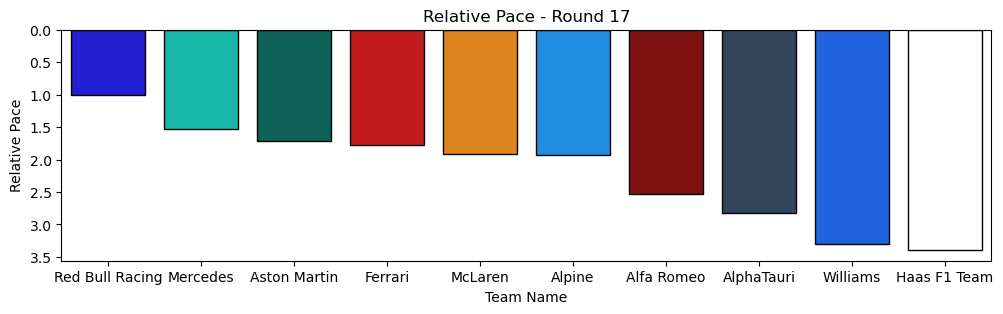

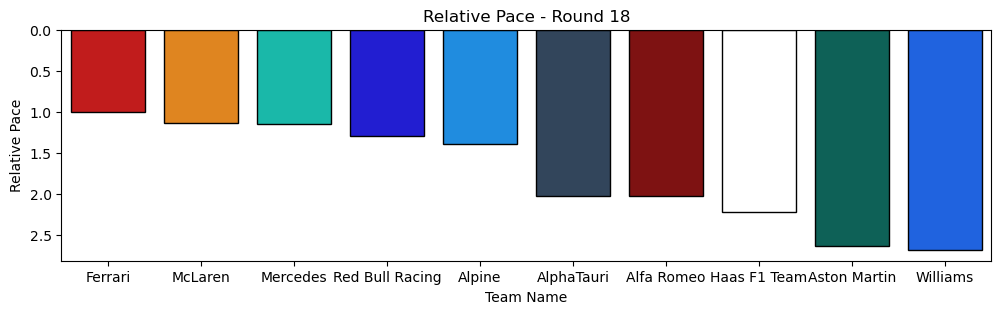

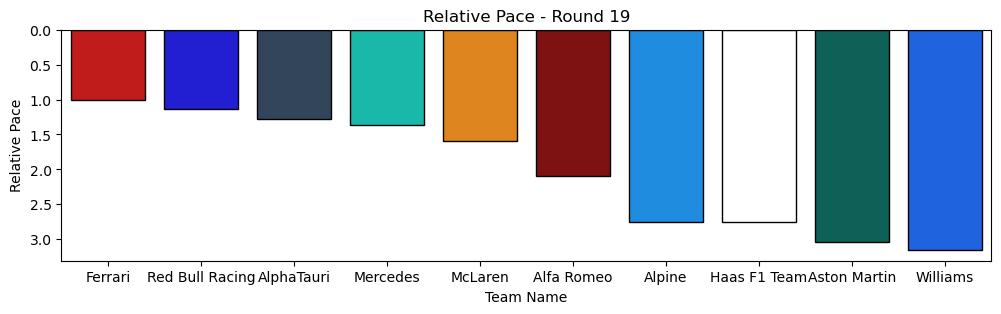

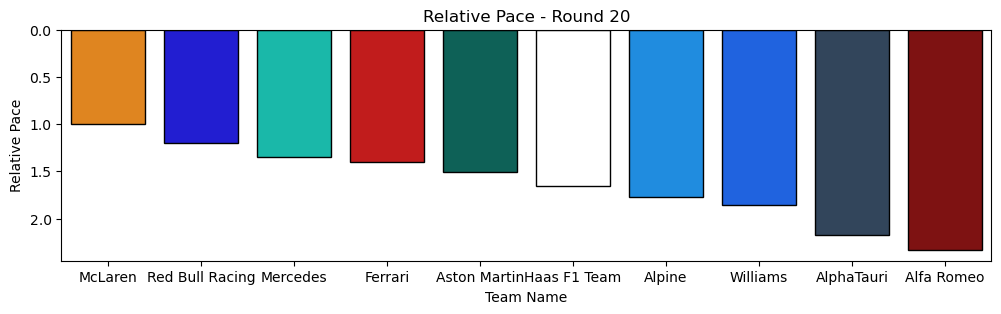

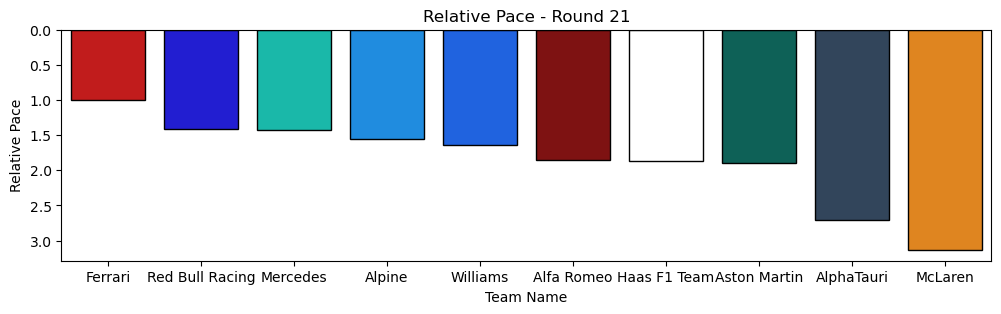

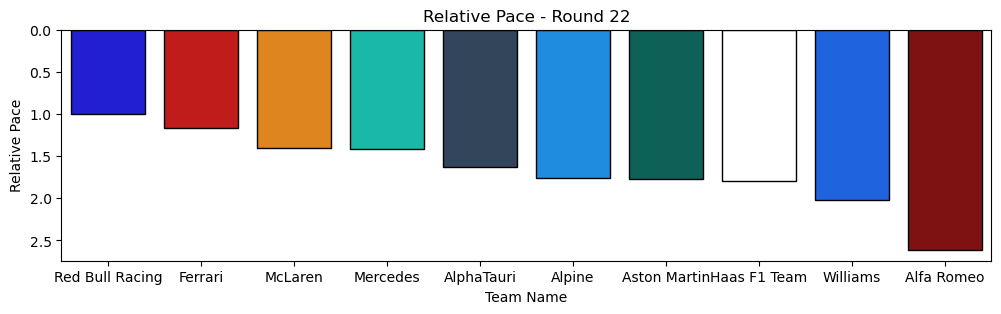

In [17]:
# Plotting for each round
for round_number, team_pace_data_new in enumerate(all_team_pace_data_new, start=11):
    # Create a figure for the current round
    plt.figure(figsize=(12, 3))
    
    # Plotting a bar chart
    sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=team_pace_data_new, 
        color='white', 
        edgecolor='black', 
        palette=team_pace_data_new['Team Name'].map(plotting.team_color).to_list()
    )
    
    # Set plot title
    plt.title(f'Relative Pace - Round {round_number}')
    
    # Invert y-axis for better readability
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

In [18]:
# Calculate average relative pace across all rounds
average_team_pace_new = pd.concat(all_team_pace_data_new).groupby('Team Name')['Relative Pace'].mean().reset_index()
average_team_pace_new = average_team_pace_new.sort_values(by='Relative Pace')
# Display the average relative pace
print("Average Relative Pace Across All Rounds:")
print(average_team_pace_new)
print("\n")

Average Relative Pace Across All Rounds:
         Team Name  Relative Pace
8  Red Bull Racing       1.197500
4          Ferrari       1.420000
7         Mercedes       1.486667
6          McLaren       1.645000
3     Aston Martin       2.158333
9         Williams       3.540833
2           Alpine       3.732500
1       AlphaTauri       3.760833
5     Haas F1 Team       3.849167
0       Alfa Romeo       4.230000




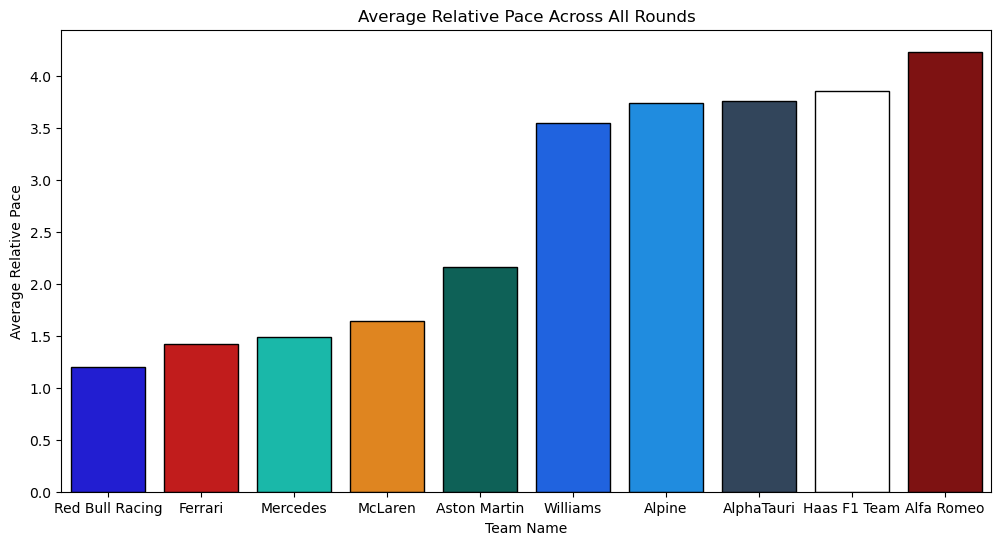

In [19]:
# Plot the average relative pace
plt.figure(figsize=(12, 6))
sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=average_team_pace_new, 
        color='white', 
        edgecolor='black', 
        palette=average_team_pace_new['Team Name'].map(plotting.team_color).to_list()
    )
#sns.barplot(x='Team Name', y='Relative Pace', data=average_team_pace, color='pink')
plt.title('Average Relative Pace Across All Rounds')
plt.ylabel('Average Relative Pace')
plt.show()

In [20]:
average_relative_pace = pd.concat(all_team_pace_data_new).groupby('Team Name')['Relative Pace'].mean().reset_index()
average_team_pace_new = average_team_pace_new.sort_values(by='Relative Pace')
# Display the average relative pace
print("Average Relative Pace Across All Rounds:")
print(average_team_pace_new)
print("\n")

Average Relative Pace Across All Rounds:
         Team Name  Relative Pace
8  Red Bull Racing       1.197500
4          Ferrari       1.420000
7         Mercedes       1.486667
6          McLaren       1.645000
3     Aston Martin       2.158333
9         Williams       3.540833
2           Alpine       3.732500
1       AlphaTauri       3.760833
5     Haas F1 Team       3.849167
0       Alfa Romeo       4.230000




<Axes: xlabel='Team Name', ylabel='Relative Pace'>

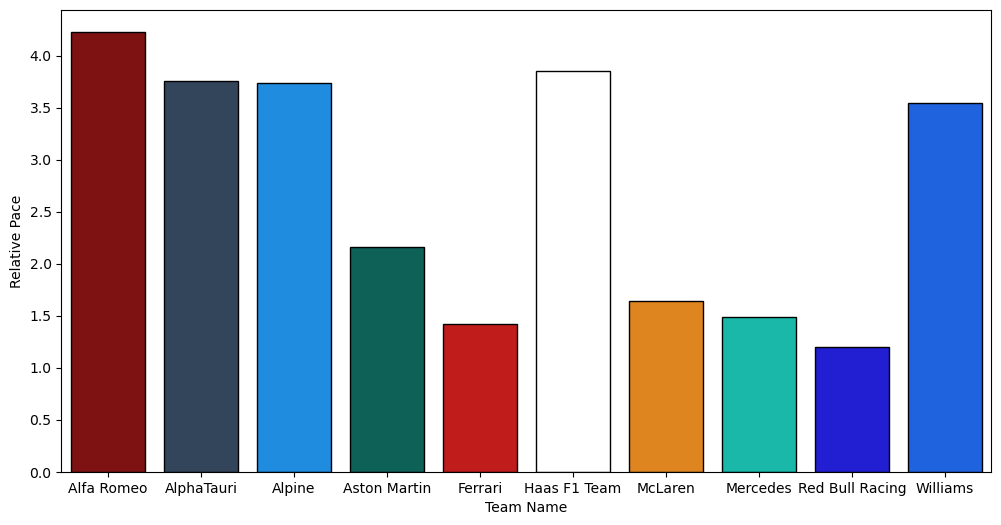

In [21]:

# Plotting the average relative pace
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Team Name', 
    y='Relative Pace', 
    data=average_relative_pace, 
    color='white', 
    edgecolor='black', 
    palette=average_relative_pace['Team Name'].map(plotting.team_color).to_list()
)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to retrieve team pace data for a given round
def get_team_pace_data_new(year, round_number):
    qualifying_session_new = ff1.get_session(year, round_number, 'Q')
    qualifying_session_new.load()
    
    # Extract results from the qualifying session
    results_new = qualifying_session_new.results
    
    # Identify the fastest driver from each team
    fastest_drivers_new_idx = results_new.groupby('TeamName')['Position'].idxmin()
    fastest_drivers_new = results_new.loc[fastest_drivers_new_idx]

    # Create a DataFrame to store team pace information
    team_pace_new = pd.DataFrame()
    
    # Extract team names
    team_pace_new['Team Name'] = fastest_drivers_new['TeamName']
    
    # Find the fastest time from Q1, Q2, and Q3 for each team
    team_pace_new['FastestTime'] = fastest_drivers_new[['Q1', 'Q2', 'Q3']].min(axis=1)
    
    # Sort the DataFrame based on the fastest time
    team_pace_new = team_pace_new.sort_values(by='FastestTime')
    
    # Calculate relative pace compared to the fastest team
    team_pace_new['Relative Pace'] = team_pace_new['FastestTime'].map(lambda time: round(time / team_pace_new.iloc[0]['FastestTime'] * 100 - 99, 2))

    return team_pace_new,fastest_drivers_new


    # Get team pace data for rounds 11 to 22
    all_team_pace_data_new = []

for round_number in range(11, 23):
    # Retrieve team pace data for the current round
    team_pace_data_new, fastest_drivers_new = get_team_pace_data(2023, round_number)
    
    # Append the data to the list for all rounds
    all_team_pace_data_new.append(team_pace_data_new)
    

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '24', '16', '77', '14', '11', '27', '55', '31', '3', '18', '10', '23', '22', '63', '20', '2']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using c

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for t

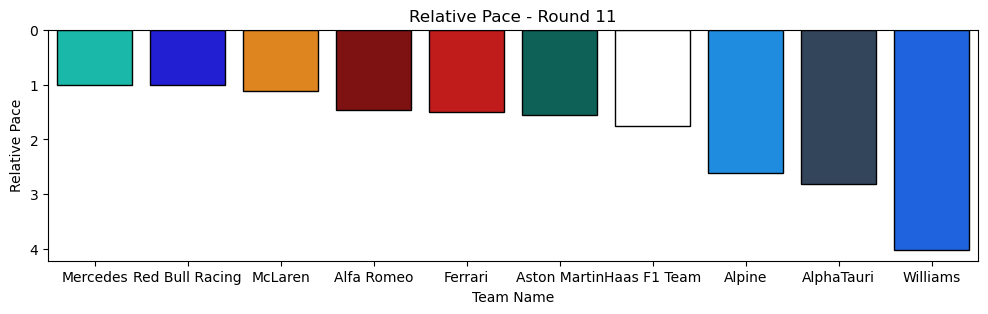

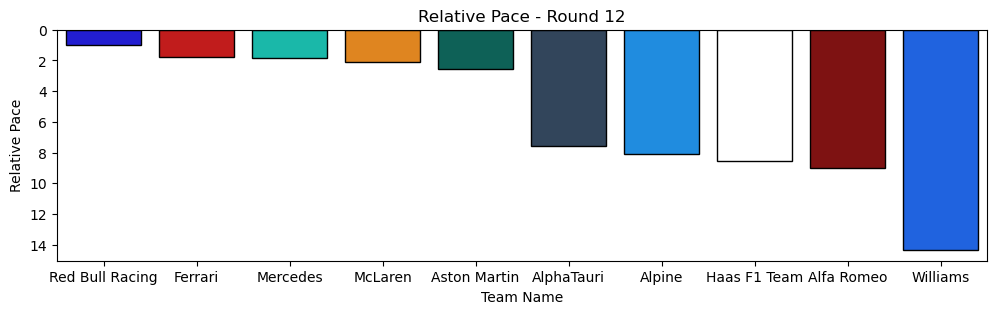

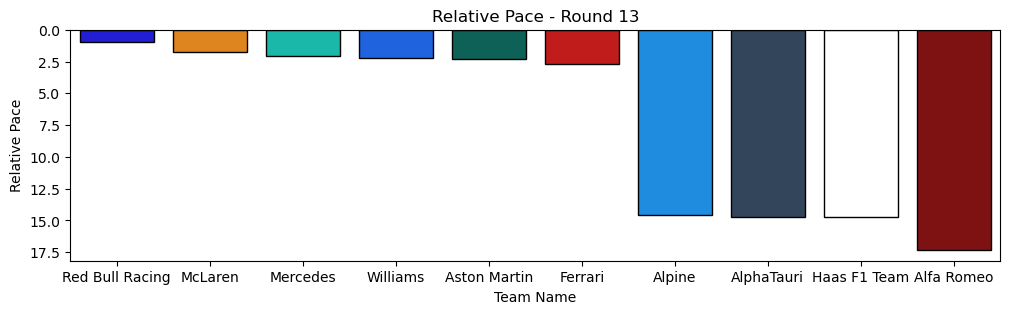

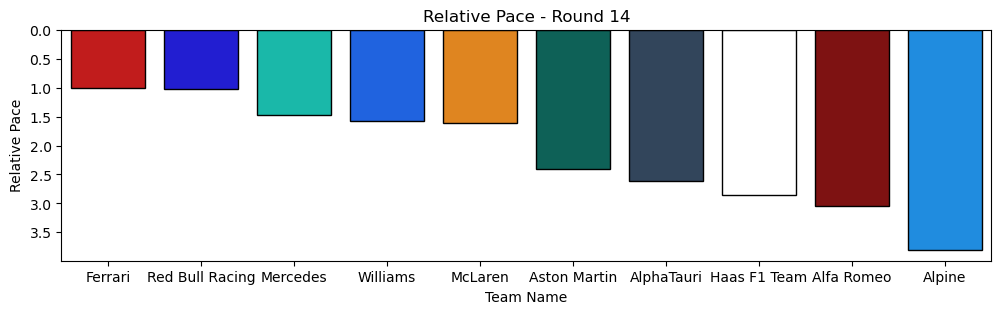

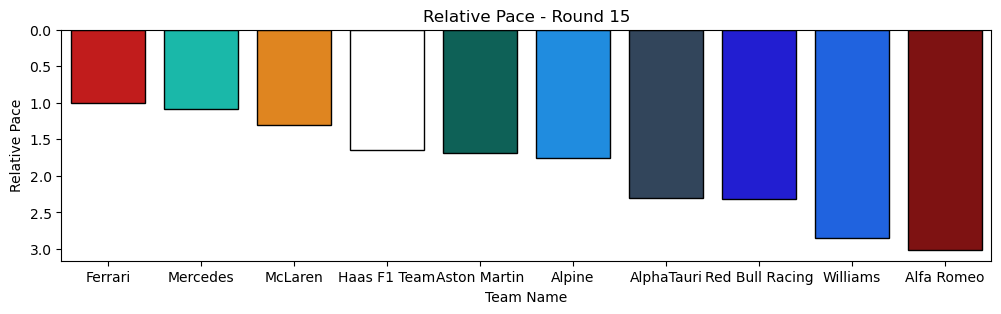

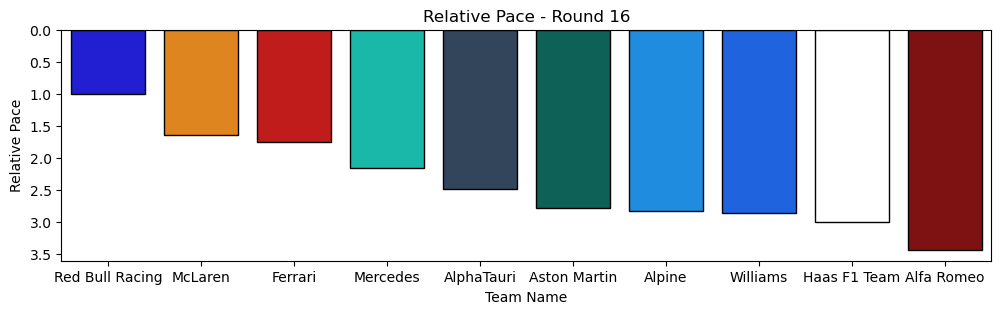

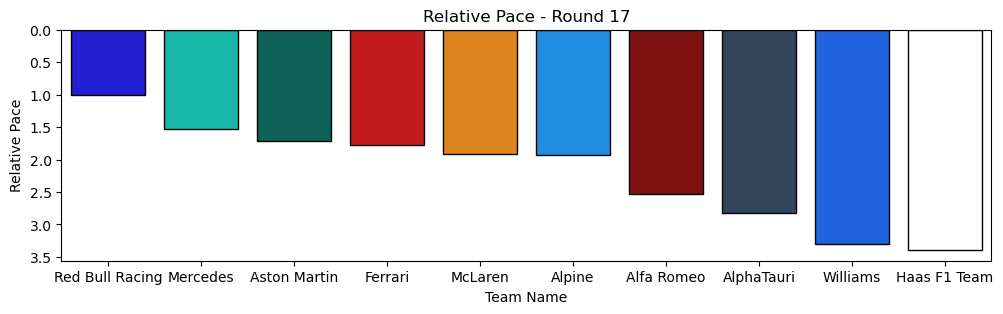

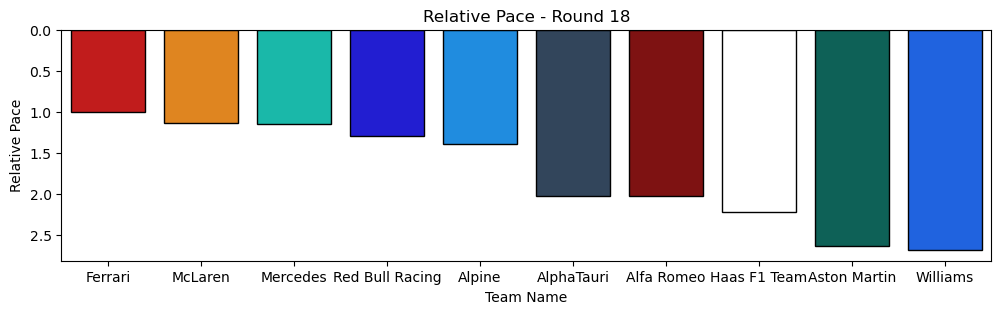

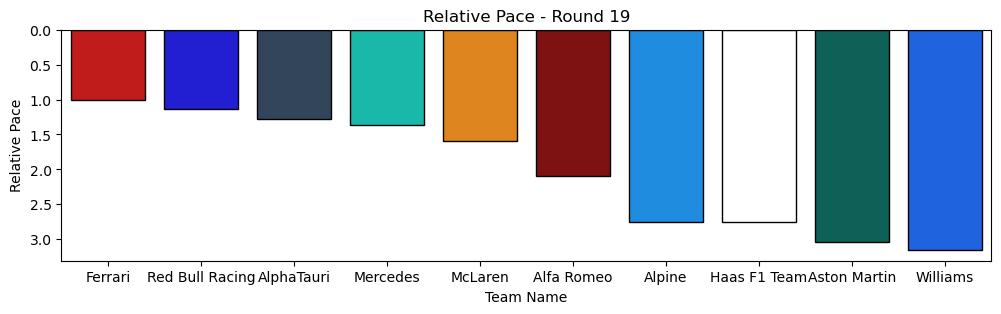

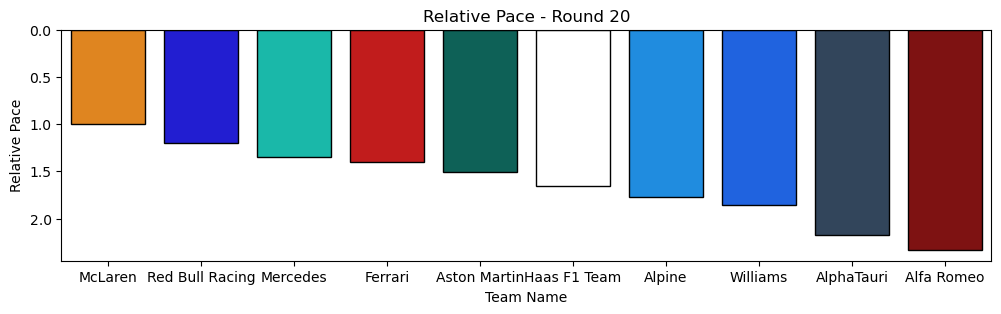

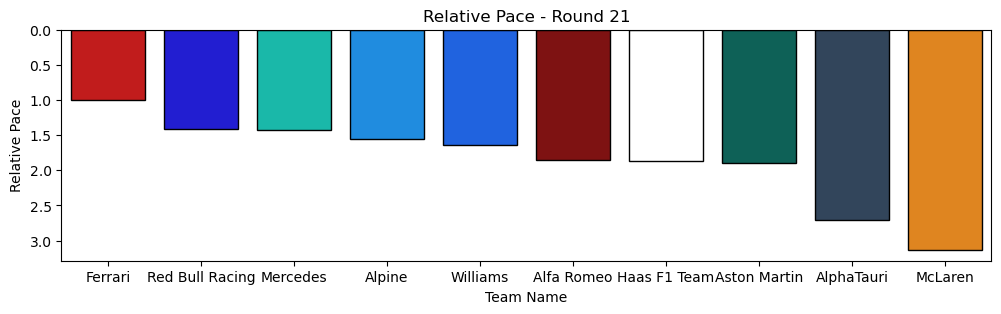

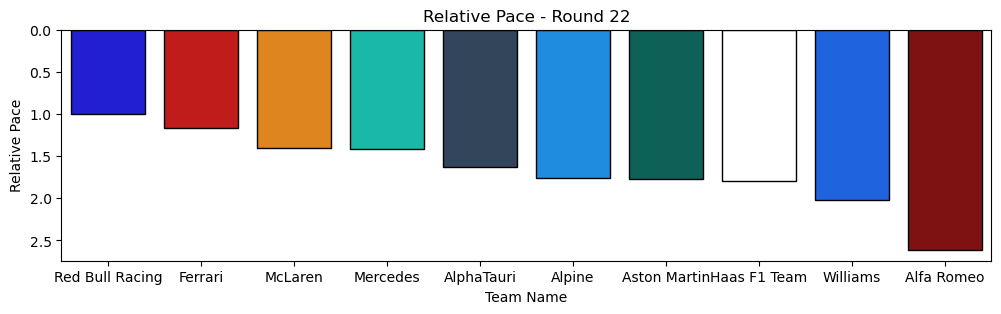

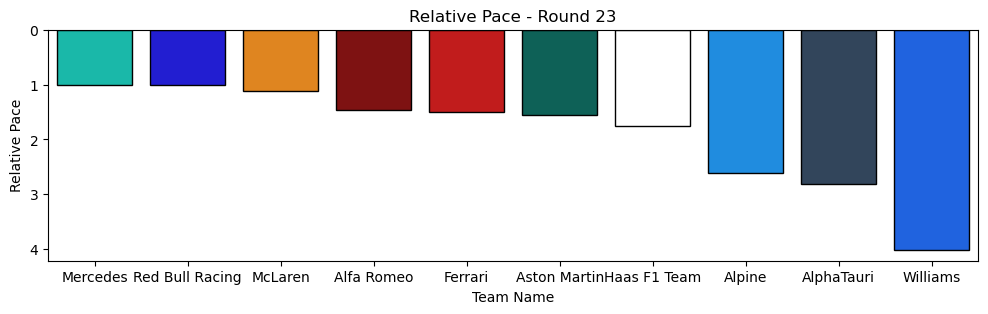

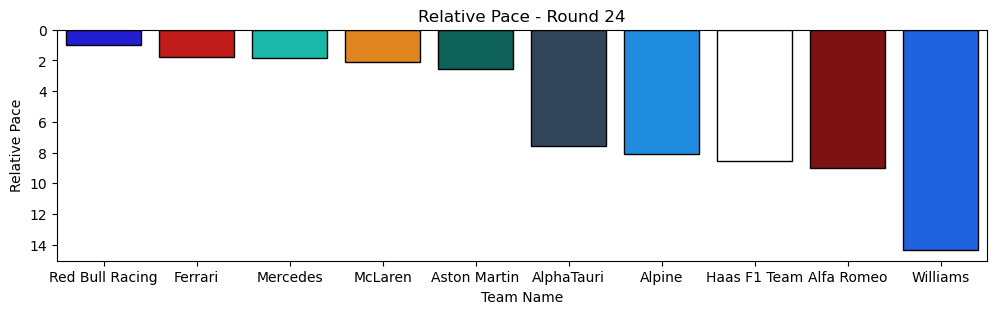

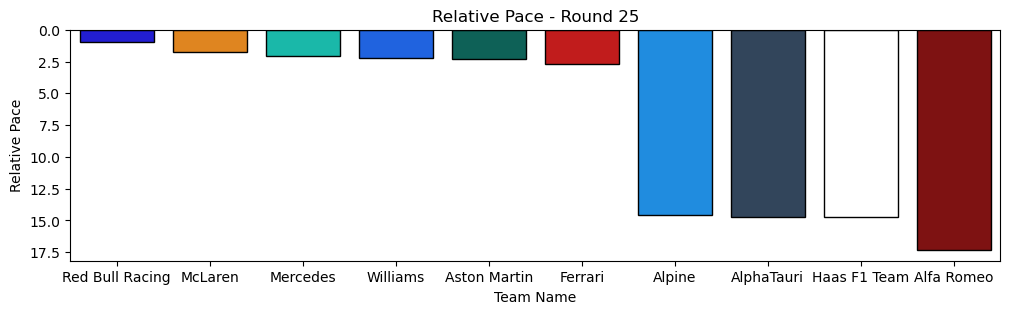

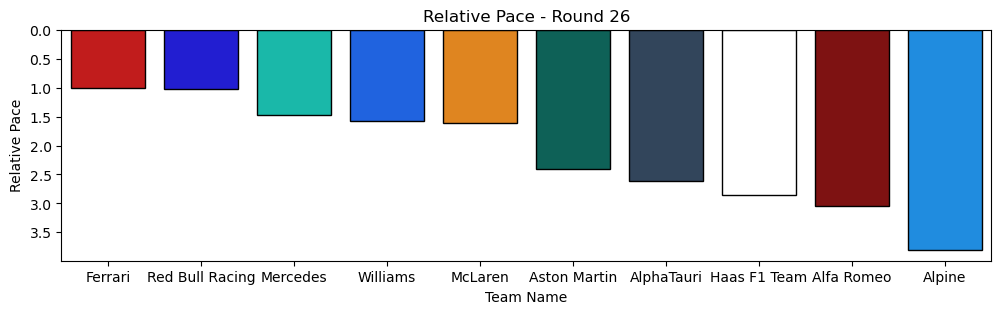

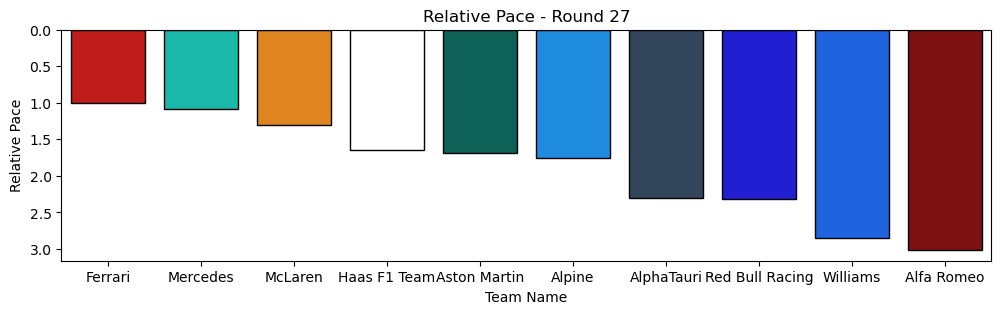

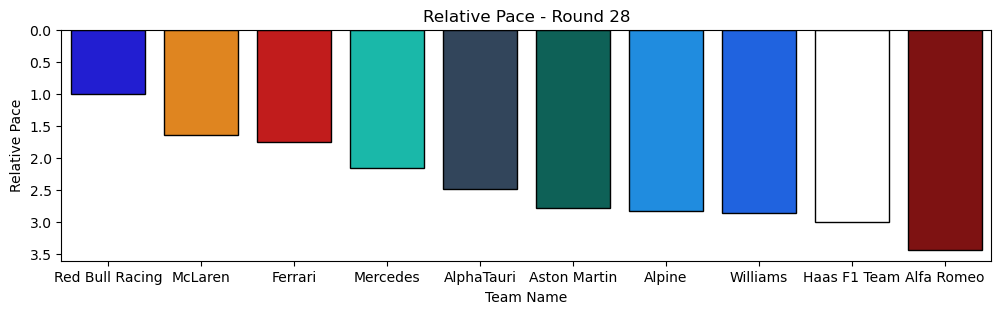

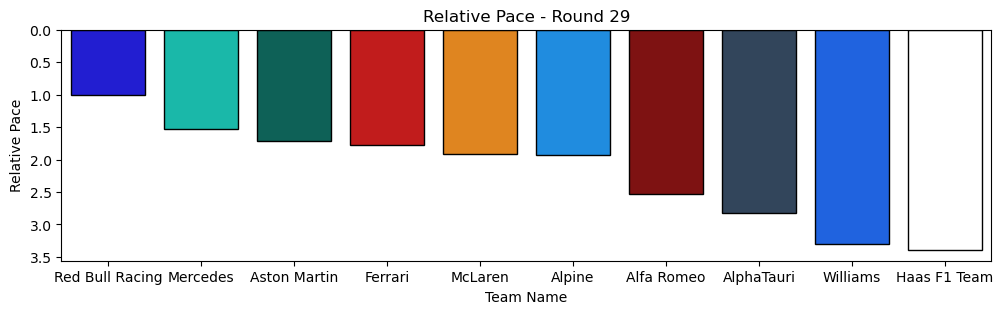

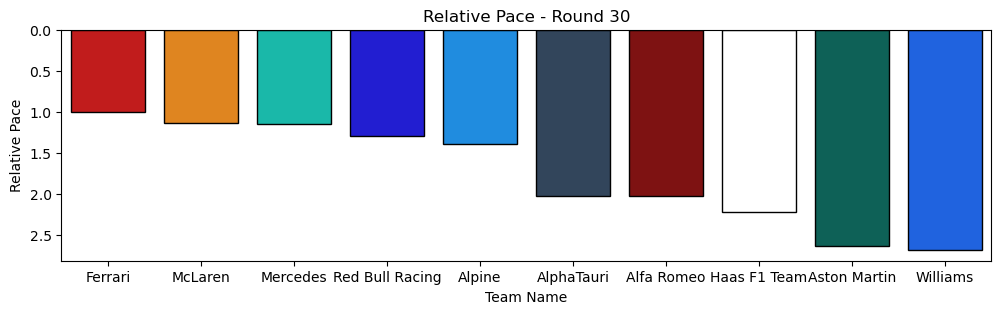

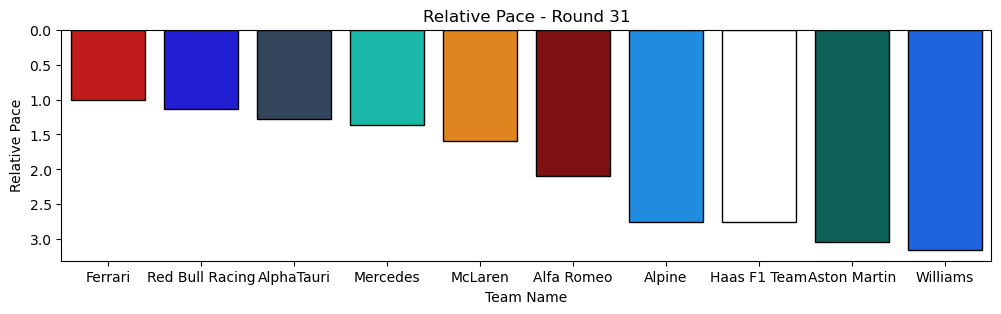

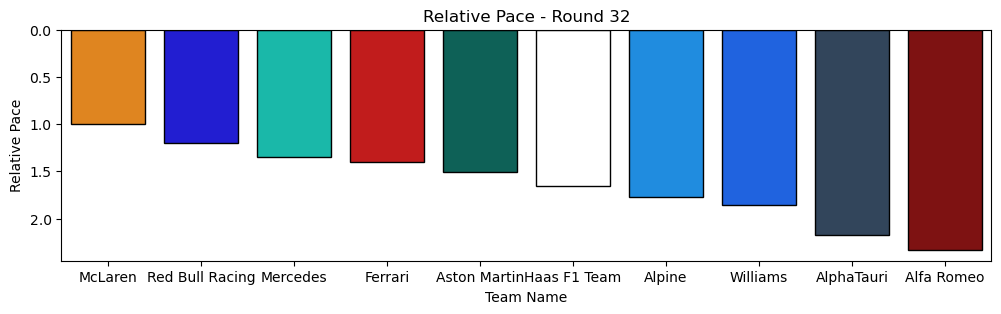

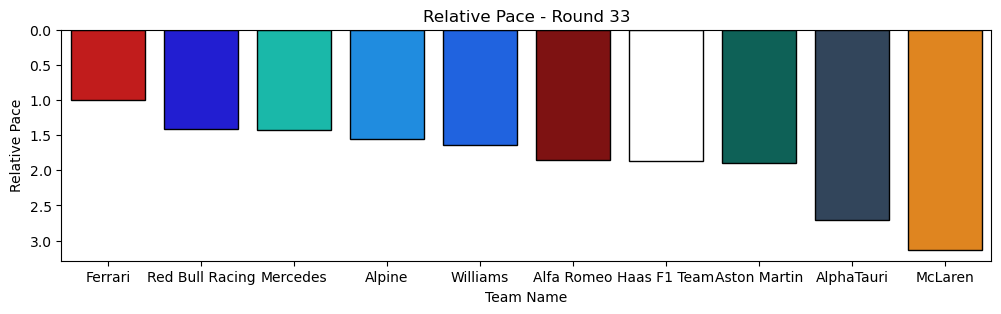

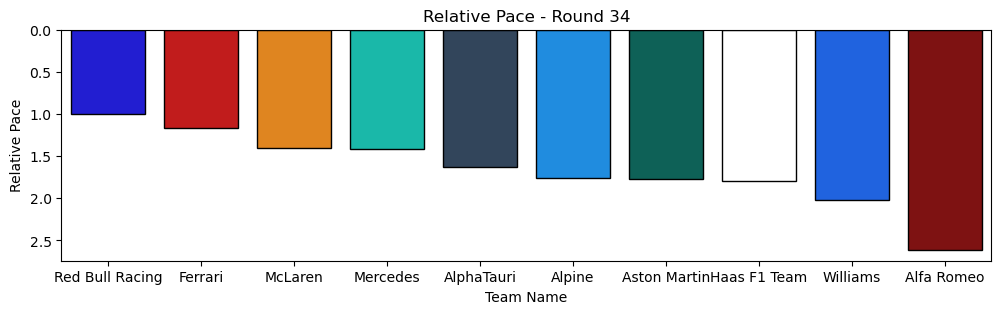

In [23]:
# Plotting for each round
for round_number, team_pace_data_new in enumerate(all_team_pace_data_new, start=11):
    # Create a figure for the current round
    plt.figure(figsize=(12, 3))
    
    # Plotting a bar chart
    sns.barplot(
        x='Team Name', 
        y='Relative Pace', 
        data=team_pace_data_new, 
        color='white', 
        edgecolor='black', 
        palette=team_pace_data_new['Team Name'].map(plotting.team_color).to_list()
    )
    
    # Set plot title
    plt.title(f'Relative Pace - Round {round_number}')
    
    # Invert y-axis for better readability
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

In [24]:
# Calculate average relative pace across all rounds
average_relative_pace = pd.concat(all_team_pace_data_new).groupby('Team Name')['Relative Pace'].mean().reset_index()
average_relative_pace = average_relative_pace.sort_values(by='Relative Pace')
# Display the average relative pace
print("Average Relative Pace Across All Rounds:")
print(average_team_pace_new)
print("\n")

Average Relative Pace Across All Rounds:
         Team Name  Relative Pace
8  Red Bull Racing       1.197500
4          Ferrari       1.420000
7         Mercedes       1.486667
6          McLaren       1.645000
3     Aston Martin       2.158333
9         Williams       3.540833
2           Alpine       3.732500
1       AlphaTauri       3.760833
5     Haas F1 Team       3.849167
0       Alfa Romeo       4.230000




<Axes: xlabel='Team Name', ylabel='Relative Pace'>

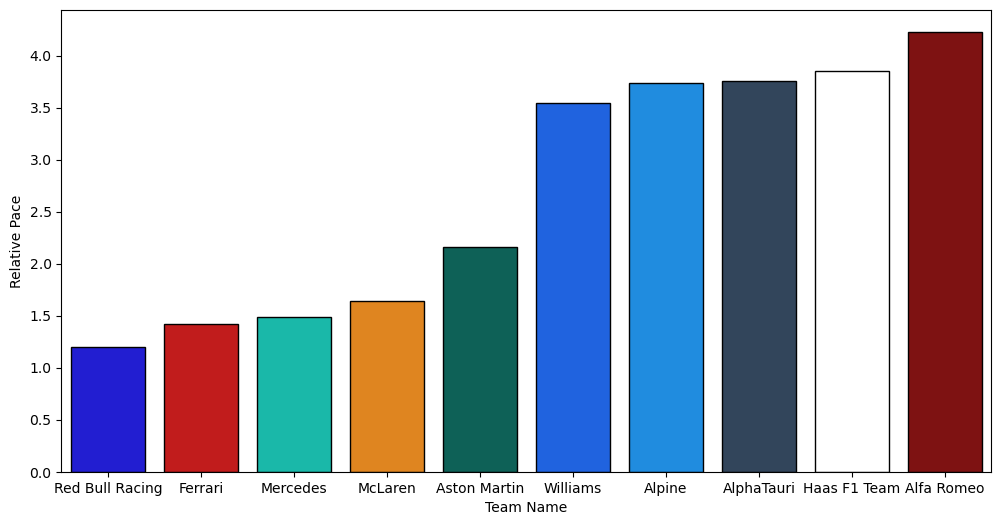

In [25]:
# Plotting the average relative pace
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Team Name', 
    y='Relative Pace', 
    data=average_relative_pace, 
    color='white', 
    edgecolor='black', 
    palette=average_relative_pace['Team Name'].map(plotting.team_color).to_list()
)